# Simulator PV Tricahue_II

- Author: Victor Muñoz
- Collaborator: Nicolás Otárola
- Pvlib_version: 0.9.0
- Date : 14-02-2022 

In [42]:
# data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Photovoltaic systems
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain

# paths
file_path_gen = '../../Data/Real_Generations_Data/'
file_path_solcast = '../../Data/Solcast_Data/'
file_path_func = '../../Functions/'

# functions AND system photovoltaic
import sys
sys.path.append(file_path_gen)
sys.path.append(file_path_solcast)
sys.path.append(file_path_func)

import functions as func
import Tricahue_II_config as pv

import imp
imp.reload(pv)
imp.reload(func)

# save graphics
%matplotlib inline
%matplotlib notebook

#new library
from pvlib.pvsystem import FixedMount
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS

import bokeh as boken
import bokeh.palettes as bkpalet #from bokeh.palettes import PuOr
import bokeh.transform as bktrans # from bokeh.transform import cumsums

In [43]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

## 1) Location , Module, Inverter, System and Model

In [44]:
#Location
loc = Location(latitude=pv.Location['lat'],
               longitude=pv.Location['long'],
               tz=pv.Location['tz'],
               altitude=pv.Location['alt'])

In [45]:
#module
module_310 = pd.Series(pv.JAM60S01_310,
                       name=pv.JAM60S01_310['Name'])

In [46]:
#inverter
inverter_800 = pd.Series(pv.SMA_America__SC800CP,
                            name=pv.SMA_America__SC800CP['Name'])

In [47]:
#System
system_A = PVSystem(module_parameters=module_310,
                    inverter_parameters=inverter_800,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_B = PVSystem(module_parameters=module_310,
                    inverter_parameters=inverter_800,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )

system_C = PVSystem(module_parameters=module_310,
                    inverter_parameters=inverter_800,
                    surface_azimuth=pv.System['azimuth'],
                    surface_tilt=pv.System['tilt'],
                    temperature_model_parameters=temperature_model_parameters,
                    modules_per_string=pv.System['m_p_s'],
                    strings_per_inverter=pv.System['s_p_i']
                   )


In [48]:
#model
mc_A = ModelChain(system_A, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_A")             # system_A

mc_B = ModelChain(system_B, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_B")             # system_B

mc_C = ModelChain(system_C, 
                  loc, 
                  aoi_model= 'physical' ,       # physical, no_loss
                  spectral_model="no_loss",    # no_loss
                  dc_model='pvwatts',              # cec or pvwatts
                  ac_model = 'pvwatts',        # snlinverter by pvwatts
                  #temp_model='sapm',           # sapm
                  #losses_model="pvwatts",     # pvwatts
                  name="system_C")             # system_C



## 2) Data Weather Solcast and Generacion solar

In [49]:
# Weather Solcast
name_csv = 'tricahue_II.csv'
solcast = func.weather_solcast_2(file_path_solcast+name_csv)
weather_columns = ['ghi','dni','dhi','temp_air', 'wind_speed','ebh','azimuth','cloud_opacity','zenith']
print(len(solcast))

times, weather = func.get_times_weather(solcast,loc,weather_columns)

#para que conincidan los largos
#to-do: automatizacion/refactoring

#print(len(times[1175:-23]))
#print(times[1175:-23])

#print(len(weather[1175:-23]))
#print(weather[1075:-23])

#times = times[1175:-23]
#weather = weather[1175:-23]

20592
primer dia 2019-08-27 00:00:00
ultimo dia 2021-12-31 23:00:00


In [50]:
# read pickle
file_name = 'Real_Generations'
file_ext = 'xlsx'
data_pickle = func.data_to_pickle(file_path_gen,file_name,file_ext)

Pickle found in: ../../Data/Real_Generations_Data/Real_Generations.pickle
Returning data


In [51]:
# names to seach
names_pv = ['PMGD PFV TRICAHUE II']

### 2.1) Hour

In [52]:
# find hourly logs for each name
data_hours = func.filter_hour_from_dataFrame(data=data_pickle,
                                      #columns_names=[],
                                      #column_fecha='Fecha'
                                      #column_central='Central',
                                      #first_year=2021,
                                      #last_year=2021,
                                      names_pv=names_pv,
                                      #months=[7,8,9,10,11,12],
                                      multi = 1000,
                                      p = False)

- Using default  ['Hora 1', 'Hora 2', 'Hora 3', 'Hora 4', 'Hora 5', 'Hora 6', 'Hora 7', 'Hora 8', 'Hora 9', 'Hora 10', 'Hora 11', 'Hora 12', 'Hora 13', 'Hora 14', 'Hora 15', 'Hora 16', 'Hora 17', 'Hora 18', 'Hora 19', 'Hora 20', 'Hora 21', 'Hora 22', 'Hora 23', 'Hora 24'] for columns_names 

- Using default Fecha for column_fecha 

- Using default Central for column_central 

- Using default 0 for first_year 

- Using default 10000 for last_year 



PMGD PFV TRICAHUE II len: 20592


<IPython.core.display.Javascript object>


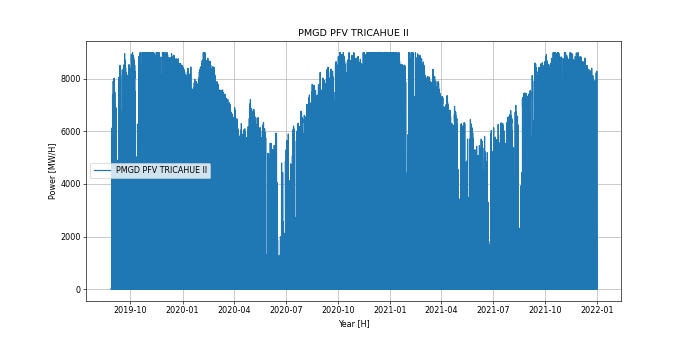

In [53]:
func.graph(data=data_hours,
           x_label= 'Year [H]',
           y_label='Power [MW/H]',
           name='hour')

### 2.2) Day

In [54]:
# find daily logs for each name
data_days = func.filter_day_from_dataFrame(data=data_pickle,
                                      #column_fecha='Fecha'
                                      #column_total='Total'
                                      #column_central='Central',
                                      #first_year=2021,
                                      #last_year=2021,
                                      names_pv=names_pv,
                                      #months=[7,8,9,10,11,12],
                                      multi = 1000,
                                      p = False)

- Using default Fecha for column_fecha 

- Using default Total for column_total 

- Using default Central for column_central 

- Using default 0 for first_year 

- Using default 10000 for last_year 



In [55]:
#pp = 0
#for i in data_days[names_pv[0]]:
#    print(pp,i,data_days[names_pv[0]][i])
#    pp = pp + 1

#c = []
#for i in data_days[names_pv[0]]:
#    c.append(i)
#    
#for i in range(43):
#    print(data_days[names_pv[0]].pop(c[i]))

#pp = 0
#for i in data_days[names_pv[0]]:
#    print(pp,i,data_days[names_pv[0]][i])
#    pp = pp + 1

PMGD PFV TRICAHUE II len: 858


<IPython.core.display.Javascript object>


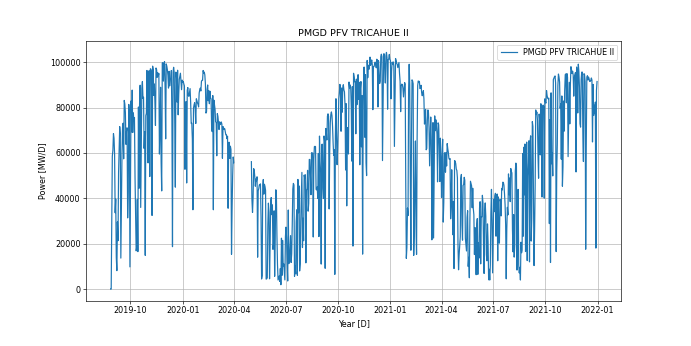

In [56]:
func.graph(data=data_days,
           x_label= 'Year [D]',
           y_label='Power [MW/D]',
           name='days')

### 2.3) Month

In [57]:
# find daily logs for each name
data_month = func.filter_month_from_dataFrame(data=data_pickle,
                                      #column_fecha='Fecha'
                                      #column_total='Total'
                                      #column_central='Central',
                                      #first_year=2021,
                                      #last_year=2021,
                                      names_pv=names_pv,
                                      #months=[7,8,9,10,11,12],
                                      multi = 1000,
                                      p = False)

- Using default Fecha for column_fecha 

- Using default Total for column_total 

- Using default Central for column_central 

- Using default 0 for first_year 

- Using default 10000 for last_year 



PMGD PFV TRICAHUE II len: 29


<IPython.core.display.Javascript object>


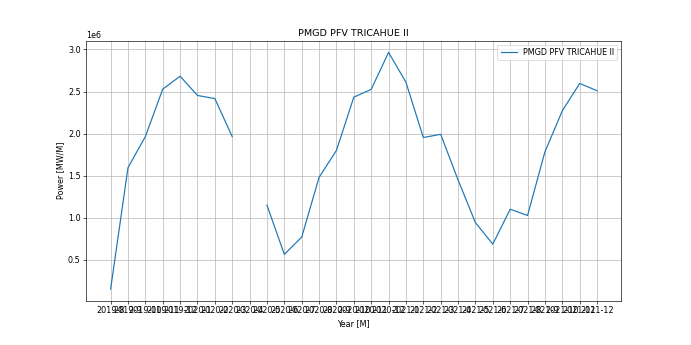

In [58]:
func.graph(data=data_month,
           x_label= 'Year [M]',
           y_label='Power [MW/M]',
           name='meses')

## 3) Simulate

In [ ]:
data_h = data_hours[names_pv[0]].values()
data_d = data_days[names_pv[0]].values()
data_m = data_moth[]


In [22]:
# Run model
#weather = pd.DataFrame([[1050,1000,100,30,5]],
#                      columns = ['ghi','dni','dhi','temp_air','wind_speed'],
#                      index=[pd.Timestamp('20170401 1200', tz='US/Arizona')])
mc_A.run_model(weather=weather)
mc_B.run_model(weather=weather)
mc_C.run_model(weather=weather)



ModelChain: 
  name: system_C
  clearsky_model: ineichen
  transposition_model: haydavies
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: pvwatts_dc
  ac_model: pvwatts_inverter
  aoi_model: physical_aoi_loss
  spectral_model: no_spectral_loss
  temperature_model: sapm_temp
  losses_model: no_extra_losses

## 4) Graphics

/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


<IPython.core.display.Javascript object>


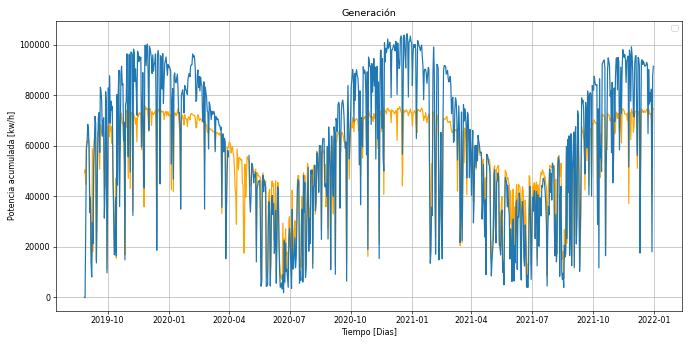

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [23]:
x_d ,y_d_a = func.get_daily_axes_from_modelChain_object(mc_A, 'System_A')
_ ,y_d_b = func.get_daily_axes_from_modelChain_object(mc_B, 'System_B')
_ ,y_d_c = func.get_daily_axes_from_modelChain_object(mc_C, 'System_C')


y_d = [(a+b+c)/1000 for a,b,c in zip(y_d_a,y_d_b,y_d_c)]
func.plot_2(x=x_d,
          y=y_d,
          y2=data,
          size=(12,6),
          save='si',
          name_file='TRICAHUE_II_dias',
          color='orange',
          title='Generación',
          x_label='Tiempo [Dias]',
          y_label='Potencia acumulada [kw/h]')

In [24]:
len(data_days[names_pv[0]].values())

858

In [25]:
len(y_d)

858

In [26]:
hh = 0
for i in x_d:
    print(hh,i)
    hh = hh+1

0 2019-08-27
1 2019-08-28
2 2019-08-29
3 2019-08-30
4 2019-08-31
5 2019-09-01
6 2019-09-02
7 2019-09-03
8 2019-09-04
9 2019-09-05
10 2019-09-06
11 2019-09-07
12 2019-09-08
13 2019-09-09
14 2019-09-10
15 2019-09-11
16 2019-09-12
17 2019-09-13
18 2019-09-14
19 2019-09-15
20 2019-09-16
21 2019-09-17
22 2019-09-18
23 2019-09-19
24 2019-09-20
25 2019-09-21
26 2019-09-22
27 2019-09-23
28 2019-09-24
29 2019-09-25
30 2019-09-26
31 2019-09-27
32 2019-09-28
33 2019-09-29
34 2019-09-30
35 2019-10-01
36 2019-10-02
37 2019-10-03
38 2019-10-04
39 2019-10-05
40 2019-10-06
41 2019-10-07
42 2019-10-08
43 2019-10-09
44 2019-10-10
45 2019-10-11
46 2019-10-12
47 2019-10-13
48 2019-10-14
49 2019-10-15
50 2019-10-16
51 2019-10-17
52 2019-10-18
53 2019-10-19
54 2019-10-20
55 2019-10-21
56 2019-10-22
57 2019-10-23
58 2019-10-24
59 2019-10-25
60 2019-10-26
61 2019-10-27
62 2019-10-28
63 2019-10-29
64 2019-10-30
65 2019-10-31
66 2019-11-01
67 2019-11-02
68 2019-11-03
69 2019-11-04
70 2019-11-05
71 2019-11-06
72

684 2021-07-11
685 2021-07-12
686 2021-07-13
687 2021-07-14
688 2021-07-15
689 2021-07-16
690 2021-07-17
691 2021-07-18
692 2021-07-19
693 2021-07-20
694 2021-07-21
695 2021-07-22
696 2021-07-23
697 2021-07-24
698 2021-07-25
699 2021-07-26
700 2021-07-27
701 2021-07-28
702 2021-07-29
703 2021-07-30
704 2021-07-31
705 2021-08-01
706 2021-08-02
707 2021-08-03
708 2021-08-04
709 2021-08-05
710 2021-08-06
711 2021-08-07
712 2021-08-08
713 2021-08-09
714 2021-08-10
715 2021-08-11
716 2021-08-12
717 2021-08-13
718 2021-08-14
719 2021-08-15
720 2021-08-16
721 2021-08-17
722 2021-08-18
723 2021-08-19
724 2021-08-20
725 2021-08-21
726 2021-08-22
727 2021-08-23
728 2021-08-24
729 2021-08-25
730 2021-08-26
731 2021-08-27
732 2021-08-28
733 2021-08-29
734 2021-08-30
735 2021-08-31
736 2021-09-01
737 2021-09-02
738 2021-09-03
739 2021-09-04
740 2021-09-05
741 2021-09-06
742 2021-09-07
743 2021-09-08
744 2021-09-09
745 2021-09-10
746 2021-09-11
747 2021-09-12
748 2021-09-13
749 2021-09-14
750 2021-0

/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


<IPython.core.display.Javascript object>


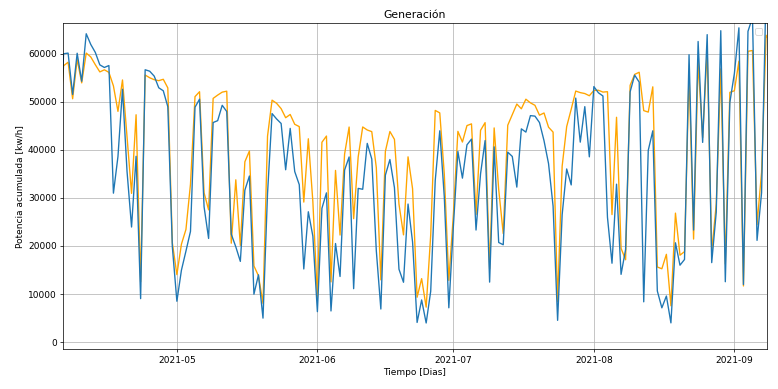

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [30]:
x_d ,y_d_a = func.get_daily_axes_from_modelChain_object(mc_A, 'System_A')
_ ,y_d_b = func.get_daily_axes_from_modelChain_object(mc_B, 'System_B')
_ ,y_d_c = func.get_daily_axes_from_modelChain_object(mc_C, 'System_C')


y_d = [(a+b+c)/1000 for a,b,c in zip(y_d_a,y_d_b,y_d_c)]
func.plot_2(x=x_d,
          y=y_d,
          y2=data,
          size=(12,6),
          save='si',
          name_file='TRICAHUE_II_dias',
          color='orange',
          title='Generación',
          x_label='Tiempo [Dias]',
          y_label='Potencia acumulada [kw/h]')

In [ ]:
func.plot_1(x=mc_A.ac.iloc[0:].index,
          y=mc_A.ac.iloc[0:].values+mc_B.ac.iloc[0:].values+mc_C.ac.iloc[0:].values+mc_D.ac.iloc[0:].values+mc_E.ac.iloc[0:].values+mc_F.ac.iloc[0:].values,
          #y2=data,
          size=(12,6),
          save='si',
          name_file='TRICAHUE_II_meses_horas',
          color='none',
          title='Generación',
          x_label='Tiempo [Horas]',
          y_label='Potencia acumulada [kw/h]')

In [27]:
#falta modificar la data de entrada para que se grafique por hora
x_m, y_m_a = func.get_monthly_axes_from_modelChain_object(mc_A,'System_A')
_, y_m_b = func.get_monthly_axes_from_modelChain_object(mc_B,'System_B')
_, y_m_c = func.get_monthly_axes_from_modelChain_object(mc_C,'System_C')


y_m = [a+b+c for a,b,c in zip(y_m_a,y_m_b,y_m_c)]

func.plot_2(x=x_m,
          y=y_m,
          y2=data_2,
          size=(12,6),
          save='si',
          name_file='TRICAHUE_II_meses',
          color='red',
          title='Generación',
          x_label='Tiempo [Meses]',
          y_label='Potencia acumulada [kw/h]')

/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)
/Users/nicolasotarolateillier/miniconda3/envs/simulador/lib/python3.8/site-packages/pvlib/modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


NameError: name 'data_2' is not defined

In [ ]:
textos_modulos = ['JA','320',''] # tienen que ser 3 textos
textos_inversores = ['SMA','3000',''] # tiene que ser 3 textos
c = func.buscador(textos_inversores,textos_modulos)

for a in c:
    print(a,":\n")
    for i in c[a]:
        print(i)

In [ ]:
pvlib.pvsystem.retrieve_sam('cecMod').JA_Solar_JAP72S01_320_SC


In [ ]:
pvlib.pvsystem.retrieve_sam('sandiainverter').SMA_America__SWR1800U__120V_
pvlib.pvsystem.retrieve_sam('sandiainverter').SMA_America__SB2000HFUS_30__240V_
pvlib.pvsystem.retrieve_sam('sandiainverter').SMA_America__SB3000HFUS_30__240V_


